---



# <span style="color: #A23B72; font-size: 1.6em;">📚 參考解答（Solution）</span>



> <span style="color: #F18F01; font-weight: bold;">💡 **使用時機**</span>：<span style="color: #E63946; font-weight: bold;">卡關超過 5 分鐘時</span>，可以參考解答






---



## <span style="color: #2E86AB; font-size: 1.4em;">任務 1 解答：讀取與查看</span>


In [12]:
# 導入必要的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 設定中文字型（避免圖表中文亂碼）
plt.rcParams['font.family'] = 'SimSun'  # Windows 系統常見中文字型
plt.rcParams['axes.unicode_minus'] = False  # 解決負號變方框問題




In [13]:
# ===== 任務 1 解答 =====

# 1.1 載入資料並查看前 10 筆
df = pd.read_csv('../../資料集/Taiwan_SuperMarket_Sales_2025.csv')
print("前 10 筆資料：")
print(df.head(10))
print(f"\n資料形狀：{df.shape[0]} 筆記錄，{df.shape[1]} 個欄位")

# 1.2 查看資料基本資訊
print("\n=== 資料基本資訊 ===")
df.info()

print("\n=== Sales 欄位統計 ===")
print(df['Sales'].describe())


前 10 筆資料：
    Invoice ID        Date Quarter Month_Name  Is_Weekend      Time  \
0  750-67-8428  2025-01-05      Q1         一月        True  13:08:00   
1  226-31-3081  2025-03-08      Q1         三月        True  10:29:00   
2  631-41-3108  2025-03-03      Q1         三月       False  13:23:00   
3  123-19-1176  2025-01-27      Q1         一月       False  20:33:00   
4  373-73-7910  2025-02-08      Q1         二月        True  10:37:00   
5  699-14-3026  2025-03-25      Q1         三月       False  18:30:00   
6  355-53-5943  2025-02-25      Q1         二月       False  14:36:00   
7  315-22-5665  2025-02-24      Q1         二月       False  11:38:00   
8  665-32-9167  2025-01-10      Q1         一月       False  17:15:00   
9  692-92-5582  2025-02-20      Q1         二月       False  13:27:00   

  Shopping_Period Store_Name Branch Store_Size  ... Quantity   Tax 5%  \
0              午餐      全聯板橋店     全聯         中型  ...        7   784.25   
1              早晨     大潤發古亭店    大潤發         大型  ...        5  

## <span style="color: #E63946; font-size: 1.4em;">任務 2 解答：篩選與分組</span>


In [14]:
# ===== 任務 2 解答 =====

# 2.1 篩選
high_sales = df[df['Sales'] > 10000]
pxmart = df[df['Branch'] == '全聯']
high_rating_members = df[(df['Customer type'] == 'Member') & (df['Rating'] > 8)]

print(f"高銷售額記錄數：{len(high_sales)}")
print(f"全聯交易數：{len(pxmart)}")
print(f"高評分會員記錄數：{len(high_rating_members)}")

# 2.2 分組聚合
city_sales = df.groupby('City')['Sales'].sum()
product_avg = df.groupby('Product line')['Sales'].mean()
branch_stats = df.groupby('Branch').agg({
    'Invoice ID': 'count',
    'Sales': 'mean'
}).rename(columns={'Invoice ID': 'Transaction_Count', 'Sales': 'Avg_Sales'})

print("\n=== 各城市總銷售額 ===")
print(city_sales)
print("\n=== 各品牌統計 ===")
print(branch_stats)

# 2.3 多維度分組
city_product_sales = df.groupby(['City', 'Product line'])['Sales'].sum()
print("\n=== 各城市×商品線銷售額 ===")
print(city_product_sales.head(10))


高銷售額記錄數：401
全聯交易數：279
高評分會員記錄數：227

=== 各城市總銷售額 ===
City
台中市    2143166.56
台北市    2006257.32
台南市     570743.33
新北市    2019548.72
桃園市    1624585.38
高雄市    1462929.51
Name: Sales, dtype: float64

=== 各品牌統計 ===
        Transaction_Count     Avg_Sales
Branch                                 
全聯                    279   9963.787563
大潤發                   116   8591.014052
好市多                   279  10956.350215
家樂福                   133   9347.891654
愛買                     51  10113.625490
楓康                     52   9395.730962
美廉社                    90   8292.358333

=== 各城市×商品線銷售額 ===
City  Product line
台中市   3C配件            306285.46
      居家生活            380855.58
      時尚配件            326312.99
      美妝保養            382330.41
      運動休閒            387527.49
      食品飲料            359854.63
台北市   3C配件            386808.74
      居家生活            286115.09
      時尚配件            336044.67
      美妝保養            233972.17
Name: Sales, dtype: float64


## <span style="color: #06A77D; font-size: 1.4em;">任務 3 解答：排序與視覺化</span>


=== Top 5 城市 ===
City
台中市    2143166.56
新北市    2019548.72
台北市    2006257.32
桃園市    1624585.38
高雄市    1462929.51
Name: Sales, dtype: float64

=== Top 3 商品線（評分）===
Product line
食品飲料    7.113218
時尚配件    7.029213
美妝保養    7.003289
Name: Rating, dtype: float64

=== Top 5 店鋪（交易筆數）===
Store_Name
好市多中和店    45
好市多台中店    37
好市多汐止店    37
好市多桃園店    37
好市多高雄店    33
Name: Invoice ID, dtype: int64


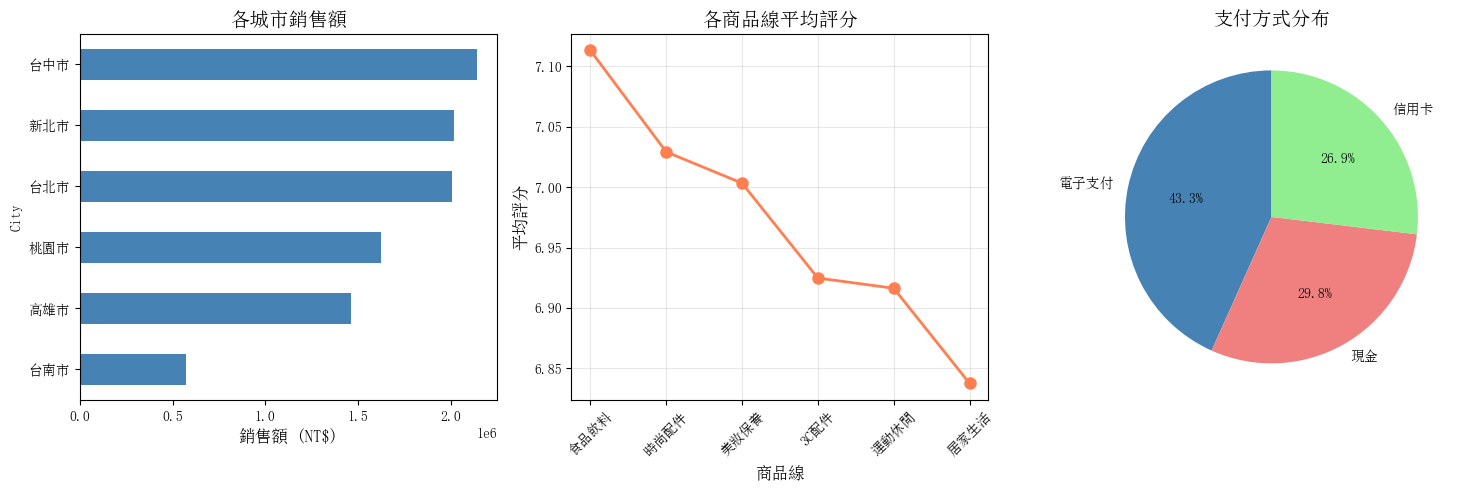


=== 週末 vs 平日比較 ===
          總銷售額     平均客單價  交易筆數
平日  6752001.34   9687.23   697
週末  3075229.48  10149.27   303


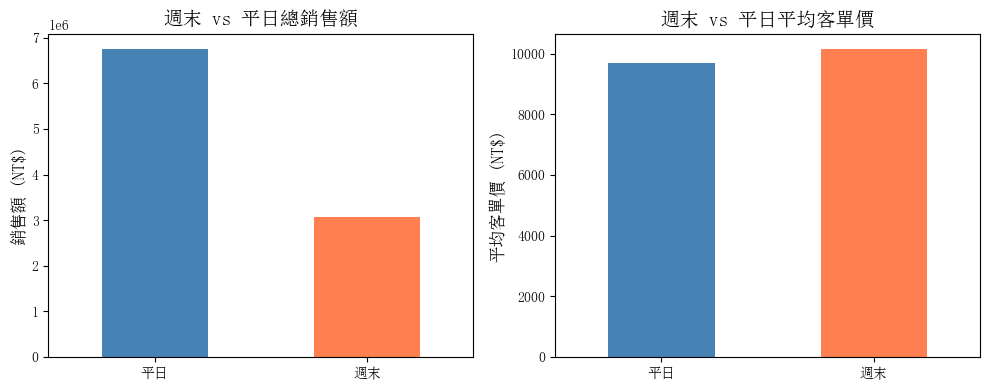

In [15]:
# ===== 任務 3 解答 =====

# 確保中文字型設定（如果前面沒有設定的話）
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimSun'
plt.rcParams['axes.unicode_minus'] = False

# 3.1 排序找出 Top
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
top_rated_products = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False).head(3)
top_stores = df.groupby('Store_Name')['Invoice ID'].count().sort_values(ascending=False).head(5)

print("=== Top 5 城市 ===")
print(top_cities)
print("\n=== Top 3 商品線（評分）===")
print(top_rated_products)
print("\n=== Top 5 店鋪（交易筆數）===")
print(top_stores)

# 3.2 視覺化
plt.figure(figsize=(15, 5))

# 圖表 1：各城市銷售額
plt.subplot(1, 3, 1)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=True)
city_sales.plot(kind='barh', color='steelblue')
plt.title('各城市銷售額', fontsize=14, fontweight='bold')
plt.xlabel('銷售額 (NT$)', fontsize=12)

# 圖表 2：各商品線平均評分
plt.subplot(1, 3, 2)
product_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
product_rating.plot(kind='line', marker='o', linewidth=2, markersize=8, color='coral')
plt.title('各商品線平均評分', fontsize=14, fontweight='bold')
plt.xlabel('商品線', fontsize=12)
plt.ylabel('平均評分', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 圖表 3：支付方式分布
plt.subplot(1, 3, 3)
payment_dist = df['Payment'].value_counts()
payment_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                  colors=['steelblue', 'lightcoral', 'lightgreen'])
plt.title('支付方式分布', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 3.3 週末 vs 平日分析
weekend_comparison = df.groupby('Is_Weekend').agg({
    'Sales': ['sum', 'mean'],
    'Invoice ID': 'count'
}).round(2)
weekend_comparison.columns = ['總銷售額', '平均客單價', '交易筆數']
weekend_comparison.index = ['平日', '週末']

print("\n=== 週末 vs 平日比較 ===")
print(weekend_comparison)

# 視覺化
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
weekend_comparison['總銷售額'].plot(kind='bar', color=['steelblue', 'coral'])
plt.title('週末 vs 平日總銷售額', fontsize=14, fontweight='bold')
plt.ylabel('銷售額 (NT$)', fontsize=12)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
weekend_comparison['平均客單價'].plot(kind='bar', color=['steelblue', 'coral'])
plt.title('週末 vs 平日平均客單價', fontsize=14, fontweight='bold')
plt.ylabel('平均客單價 (NT$)', fontsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


---

# <span style="color: #2E86AB; font-size: 1.6em;">📖 補充資料：Pandas 核心操作速查表</span>

---

## <span style="color: #2E86AB; font-size: 1.4em;">1. 讀取 (Read) - 萬物始於數據</span>

```python
# CSV 檔案
df = pd.read_csv('file.csv')

# Excel 檔案
df = pd.read_excel('file.xlsx')

# JSON 檔案
df = pd.read_json('file.json')
```

---

## <span style="color: #F18F01; font-size: 1.4em;">2. 查看 (View) - 先看一眼，心中有數</span>

```python
# 查看前幾筆資料
df.head()        # 預設 5 筆
df.head(10)      # 前 10 筆
df.tail()        # 後 5 筆

# 查看資料基本資訊
df.info()        # 欄位名稱、資料型態、缺失值
df.shape         # (筆數, 欄位數)
df.columns       # 欄位名稱列表
df.dtypes        # 各欄位資料型態

# 查看統計資訊
df.describe()    # 數值欄位統計（平均值、標準差等）
df['Sales'].describe()  # 特定欄位統計
df.value_counts()  # 計算各值出現次數
```

---

## <span style="color: #A23B72; font-size: 1.4em;">3. 篩選 (Select) - 挑出黃金數據</span>

```python
# 單條件篩選
df[df['Sales'] > 10000]
df[df['Branch'] == '全聯']

# 多條件篩選（使用 & 和 |）
df[(df['Sales'] > 10000) & (df['Branch'] == '全聯')]  # AND
df[(df['Sales'] > 10000) | (df['Rating'] > 8)]       # OR

# 使用 .loc[] 篩選並選擇欄位
df.loc[df['Sales'] > 10000, ['Invoice ID', 'Sales', 'Branch']]

# 使用 .iloc[] 按位置選擇
df.iloc[0:10, 0:5]  # 前10行，前5列
```

---

## <span style="color: #06A77D; font-size: 1.4em;">4. 分組 (Group) - 分門別類，洞察規律</span>

```python
# 單一欄位分組
df.groupby('City')['Sales'].sum()      # 總和
df.groupby('City')['Sales'].mean()     # 平均值
df.groupby('City')['Sales'].count()    # 計數

# 多個統計值
df.groupby('City').agg({
    'Sales': ['sum', 'mean'],
    'Invoice ID': 'count'
})

# 多維度分組
df.groupby(['City', 'Product line'])['Sales'].sum()

# 自訂函數
df.groupby('City')['Sales'].apply(lambda x: x.max() - x.min())
```

---

## <span style="color: #E63946; font-size: 1.4em;">5. 排序 (Sort) - 讓重要資訊一目了然</span>

```python
# 單一欄位排序
df.sort_values('Sales', ascending=False)  # 由大到小
df.sort_values('Sales', ascending=True)   # 由小到大

# 多欄位排序
df.sort_values(['City', 'Sales'], ascending=[True, False])

# 找出 Top N
df.nlargest(5, 'Sales')   # Top 5
df.nsmallest(5, 'Sales')  # Bottom 5
```

---

## <span style="color: #2E86AB; font-size: 1.4em;">6. 新增欄位 (Add) - 從現有資料創造新資訊</span>

```python
# 新增單一欄位
df['New_Column'] = df['Sales'] * 1.05

# 使用條件新增欄位
df['High_Sales'] = df['Sales'] > 10000

# 使用函數新增欄位
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# 使用 apply() 新增欄位
df['Category'] = df['Sales'].apply(lambda x: 'High' if x > 10000 else 'Low')
```

---

## <span style="color: #A23B72; font-size: 1.4em;">7. 合併 (Merge) - 關聯數據，完整故事</span>

```python
# 內連接（只保留兩邊都有的）
pd.merge(df1, df2, on='ID', how='inner')

# 左連接（保留左邊所有）
pd.merge(df1, df2, on='ID', how='left')

# 外連接（保留兩邊所有）
pd.merge(df1, df2, on='ID', how='outer')

# 多欄位合併
pd.merge(df1, df2, on=['City', 'Branch'], how='inner')
```

---

## <span style="color: #06A77D; font-size: 1.4em;">8. 視覺化 (Visualize) - 用圖表說故事</span>

```python
import matplotlib.pyplot as plt

# 設定中文字型
plt.rcParams['font.family'] = 'SimSun'  # Windows 系統常見中文字型
plt.rcParams['axes.unicode_minus'] = False

# 長條圖
df.groupby('City')['Sales'].sum().plot(kind='bar')
df.groupby('City')['Sales'].sum().plot(kind='barh')  # 橫向

# 折線圖
df.groupby('Month')['Sales'].mean().plot(kind='line', marker='o')

# 圓餅圖
df['Payment'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# 散點圖
df.plot(x='Sales', y='Rating', kind='scatter')

# 多圖表
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
# 圖表1
plt.subplot(1, 3, 2)
# 圖表2
plt.subplot(1, 3, 3)
# 圖表3
plt.tight_layout()
plt.show()
```

---

**<span style="color: #06A77D; font-size: 1.5em;">🎉 恭喜完成 Pandas 核心操作速成課程！</span>**

**<span style="color: #2E86AB; font-size: 1.2em;">下一步</span>**：<span style="color: #A23B72; font-weight: bold;">繼續練習，將這些技巧應用到你的實際工作中！</span>

